In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.churn = (df.churn == 'yes').astype(int)

In [4]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

In [5]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [6]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [7]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [8]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]

In [9]:
small_subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[small_subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [10]:
val_dict_small = df_val[small_subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)

y_pred_small = model_small.predict_proba(X_small_val)[:, 1]
y_pred_small

array([0.0162059 , 0.5851175 , 0.58502842, ..., 0.33555371, 0.60117704,
       0.58919853])

In [11]:
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8055358410220014)

### 4.2 Accuracy and Dummy Model

* Evaluate the model on different thresholds
* Check the accuracy of dummy baselines

In [12]:
# accuracy tells the fraction of our correct predictions
y_pred = model.predict_proba(X_val)[:, 1]
churn = y_pred >= 0.5
(churn == y_val).mean()

np.float64(0.8055358410220014)

In [13]:
# number of customers
len(y_val)

1409

In [14]:
# number of correct prediction

(y_val == churn_decision).sum()

np.int64(1135)

In [15]:
# accuracy = (number of correct prediction) / (number of customers) 

accuracy = (y_val == churn_decision).sum() / len(y_val)
accuracy



np.float64(0.8055358410220014)

In [16]:
# find out if the 0.5 decision threshold is ideal by moving the threshold
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [17]:
# loop through the thresholds
thresholds = np.linspace(0, 1, 21)

# define a list to hold the score
scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean() # using custom implementation
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.508
0.10 0.605
0.15 0.664
0.20 0.705
0.25 0.738
0.30 0.759
0.35 0.767
0.40 0.781
0.45 0.793
0.50 0.806
0.55 0.804
0.60 0.800
0.65 0.787
0.70 0.766
0.75 0.742
0.80 0.729
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [18]:
# view the scores
# scores

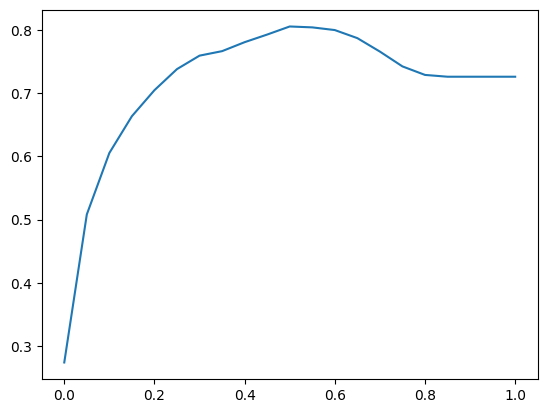

In [19]:
# plot the scores against the thresholds
plt.plot(thresholds, scores)

In [20]:
# using package from sklearn.metrics to ascertain the accuracy
from sklearn.metrics import accuracy_score

In [21]:
# pass the actual values and predictions as parameters to sklearn accuracy_score
accuracy_score(y_val, y_pred >= 0.5)

0.8055358410220014

In [22]:
# loop through the thresholds
thresholds = np.linspace(0, 1, 21)

# define a list to hold the score
scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t) # using sklearn accuracy_score now
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.508
0.10 0.605
0.15 0.664
0.20 0.705
0.25 0.738
0.30 0.759
0.35 0.767
0.40 0.781
0.45 0.793
0.50 0.806
0.55 0.804
0.60 0.800
0.65 0.787
0.70 0.766
0.75 0.742
0.80 0.729
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [23]:
# customers are churning if score is greater than 1.0
# the curve above represent the cases for when customers are not churning, hence, all predicted values for churning are false
y_pred >= 1.0

array([False, False, False, ..., False, False, False])

In [24]:
# count all false values and true values in our prediction
from collections import Counter

In [25]:
# NOTE that the dummy model is predicting all customers as non-churning
count_false_values = Counter(y_pred >= 1.0)
count_false_values

Counter({np.False_: 1409})

#### CLASS IMBALANCE

We have approximately 3x more non-churning customers than churning ones.

accuracy isn't telling us how good the model

Our original model's accuracy = 0.8055358410220014 computed using (churn == y_val).mean() or accuracy = (y_val == churn_decision).sum() / len(y_val)

Our dummy model's accuracy approximates 0.73 ascertained from one of the thresholds and score values in the loop at print('%.2f %.3f' % (t, score)) = 1.00 0.726. This implies the dummy model would be accurate approximately 73% of the time, and incorrect approximate 23% of the times when customers are churning.


In [26]:
# checking the distribution of y_val indicated that there are a lot more non-churning customers (i.e. 1023) than there are churning customers (386)
Counter(y_val)

Counter({np.int64(0): 1023, np.int64(1): 386})

In [27]:
# mean shows the approx percentages of churning and non-churning customers

churning_customers = (y_val).mean() * 100
non_churning_customers = (1 - (y_val).mean()) * 100

print(f'Percentage of Churning customers: {churning_customers:.2f}%')
print(f'Percentage of Non-churning customers: {non_churning_customers:.2f}%')

Percentage of Churning customers: 27.40%
Percentage of Non-churning customers: 72.60%


### 4.3 Confusion table

* Different types of errors and correct decisions
* Arranging them in a table

In [28]:
# Evaluating the quality of our model so it isn't affected by the CLASS IMBALANCE

In [29]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

actual_positive, actual_negative

(array([False, False, False, ..., False,  True,  True]),
 array([ True,  True,  True, ...,  True, False, False]))

In [30]:
#
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

predict_positive, predict_negative

(array([False, False, False, ..., False,  True,  True]),
 array([ True,  True,  True, ...,  True, False, False]))

In [31]:
#
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

tp, tn

(np.int64(212), np.int64(923))

In [32]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

fp, fn

(np.int64(100), np.int64(174))

In [33]:
#
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

confusion_matrix

array([[923, 100],
       [174, 212]])

In [34]:
# relative numbers

(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.66, 0.07],
       [0.12, 0.15]])

### 4.4 Precision and Recall

In [35]:
# another way of expressing accuracy
(tp + tn) / (tp + tn + fp + fn)

np.float64(0.8055358410220014)

In [36]:
# precision evaluates fractions of Positive Predictions that are Correct (tp /(tp + fp))

tp = (predict_positive & actual_positive).sum()
fp = (predict_positive & actual_negative).sum()

customer_predicted_to_be_on_promotional_email_list = tp + fp

fraction_of_positive_correct_precision = (tp /(tp + fp))

fraction_of_positive_incorrect_precision = 1 - fraction_of_positive_correct_precision


print(f'Customers on promotional email list based on prediction they are churning: {customer_predicted_to_be_on_promotional_email_list}')

print(f'Precise prediction of customers on promotional email list who churned: {tp}')

print(f"Customers on promotional email list incorrectly predicted to churn: {fp}")

print(f'Percentage of Positive Correct Predictions: {100 * fraction_of_positive_correct_precision:.2f}%')

print(f'Percentage of Positive Incorrect Predictions: {100 * fraction_of_positive_incorrect_precision:.2f}%')

Customers on promotional email list based on prediction they are churning: 312
Precise prediction of customers on promotional email list who churned: 212
Customers on promotional email list incorrectly predicted to churn: 100
Percentage of Positive Correct Predictions: 67.95%
Percentage of Positive Incorrect Predictions: 32.05%


In [37]:
# FRACTIONS OF CORRECTLY IDENTIFIED POSITIVE EXAMPLES
# recall evaluates fractions of churning customers that were identified Correctly = (tp /(tp + fn))

tp = (predict_positive & actual_positive).sum()
fn = (predict_negative & actual_positive).sum()

customer_that_correctly_should_be_on_promotional_email_list = tp + fn

fraction_of_positive_correct_observation = (tp /(tp + fn))

fraction_of_churning_customers_incorrectly_identified_as_non_churning = 1 - fraction_of_positive_correct_observation


print(f'Customers that correctly should be on promotional email list: {customer_that_correctly_should_be_on_promotional_email_list}')

print(f'Precise prediction of customers on promotional email list who churned: {tp}')

print(f'Percentage of actual observation of customers who churned: {100 * fraction_of_positive_correct_observation:.2f}%')

print(f"Customers who churned but incorrectly predicted as non-churning and so were not on promotional email list: {fn}")

print(f'Percentage of customers who were churning but failed to be identified: {100 * fraction_of_churning_customers_incorrectly_identified_as_non_churning:.2f}%')




Customers that correctly should be on promotional email list: 386
Precise prediction of customers on promotional email list who churned: 212
Percentage of actual observation of customers who churned: 54.92%
Customers who churned but incorrectly predicted as non-churning and so were not on promotional email list: 174
Percentage of customers who were churning but failed to be identified: 45.08%


### 4.5 Receiver Operating Characteristic (ROC) Curves
* TPR and FPR
* ROC Curves are a graphical representation of a classification model's performance, plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at different thresholds. This helps evaluate the model's ability to distinguish between positive and negative classes.

In [38]:
# True Positive Rate (TPR)
tpr = tp / (tp + fn)
tpr

np.float64(0.5492227979274611)

In [39]:
# False Positive Rate (FPR)
fpr = fp / (fp + tn)
fpr

np.float64(0.09775171065493646)

In [40]:
# ROC curve considers all thresholds under evaluation and plot them

scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [41]:
# scores

In [42]:
# convert / save the scores into a DataFrame
pd.DataFrame(scores)

,0,1,2,3,4
0,0.00,386,1023,0,0
1,0.01,385,901,1,122
2,0.02,383,808,3,215
3,0.03,382,753,4,270
4,0.04,382,714,4,309
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [43]:
# define columns for the created DataFrame
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [44]:
# view the updated dataframe
df_scores

,threshold,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,901,1,122
2,0.02,383,808,3,215
3,0.03,382,753,4,270
4,0.04,382,714,4,309
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [45]:
# include tpr and fpr to the df_scores dataframe
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [46]:
# peruse a subset of the records
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,367,537,19,486,0.950777,0.524927
20,0.2,337,367,49,656,0.873057,0.358749
30,0.3,292,245,94,778,0.756477,0.239492
40,0.4,252,175,134,848,0.652850,0.171065
50,0.5,212,100,174,923,0.549223,0.097752
60,0.6,155,51,231,972,0.401554,0.049853
70,0.7,69,13,317,1010,0.178756,0.012708
80,0.8,4,0,382,1023,0.010363,0.000000
90,0.9,0,0,386,1023,0.000000,0.000000


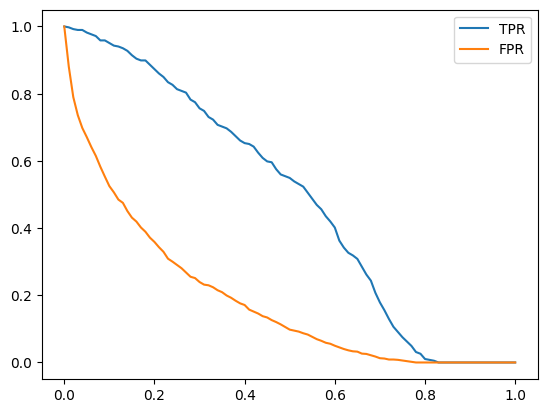

In [47]:
# plot TPR and the FPR curves
plt.plot(df_scores.threshold, df_scores['tpr'], label = 'TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label = 'FPR')
plt.legend()


### Random model

In [48]:
# for our threshold of 0.5 we can see how many mistakes we make. 
# But looking at this graph alone doesn't give us a enough insights 
# because we don't have anything to compare it against. Next we define 
# a baseline for a random model used for making decisions, based on the 
# flip of a coin, whether a customer is churning or not completely randomly

In [49]:
# start by assigning every customer a score between 0 and 1
y_rand = np.random.uniform(0, 1, size=len(y_val))
y_rand

array([0.56426539, 0.7796526 , 0.02101606, ..., 0.93788297, 0.22343955,
       0.08649954])

In [50]:
# fix a random seed
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [51]:
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089])

In [52]:
# test the accuracy of the random model predicting more than 50% will churn and comparing this with the actual churn rate
((y_rand >= 0.5) == y_val)

array([ True, False,  True, ..., False, False, False])

In [53]:
# the mean shows that 50% of the cases the random model was correct
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [54]:
# plot ROC curve for the random model

def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
        
        scores.append((t, tp, fp, fn, tn))
        
    # define columns for the created DataFrame
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    # include tpr and fpr to the dataframe
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [55]:
# use the function with the dataframe of the random model for predictions

df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [56]:
# peruse a subset of the records from the random model
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


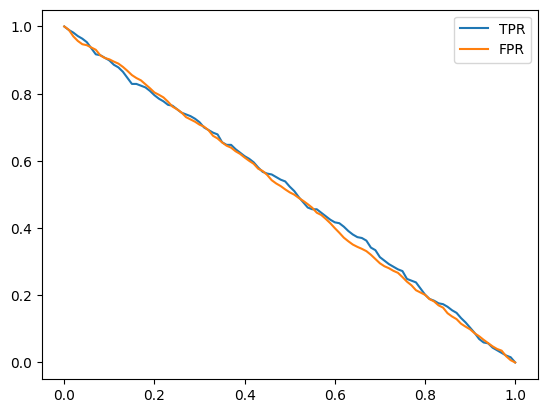

In [57]:
# plot TPR and the FPR curves for the random model
plt.plot(df_rand.threshold, df_rand['tpr'], label = 'TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label = 'FPR')
plt.legend()

* Ideal model

In [58]:
# to start implementing the ideal model that get the correct score for everyone

# get number of customers not churning
num_neg = (y_val == 0).sum() 

# get number of customers churning
num_pos = (y_val == 1).sum() 

num_neg, num_pos

(np.int64(1023), np.int64(386))

In [59]:
# use the repeat function to order the negatives and positives in the val dataset
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [60]:
# create prediction: numbers between 0s and 1s for as as there numbers in val dataset
y_ideal_pred = np.linspace(0, 1, len(y_val))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00])

In [61]:

1 - y_val.mean()

np.float64(0.7260468417317246)

In [62]:
# test accuracy: prediction is correct for all clients above this threshold
# NOTE: this model doesn't exist in reality

((y_ideal_pred >= 0.726) == y_ideal).mean()

np.float64(1.0)

In [63]:
# use the function with the dataframe of the ideal model for predictions
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

In [64]:

df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


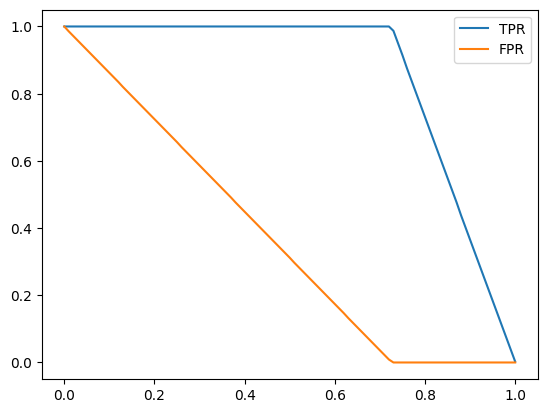

In [65]:
# plot TPR and the FPR curves for the ideal model
plt.plot(df_ideal.threshold, df_ideal['tpr'], label = 'TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label = 'FPR')
plt.legend()

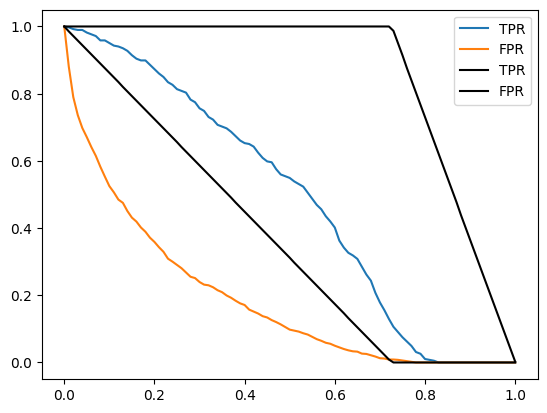

In [66]:
# all models

# plot TPR and the FPR curves for the actual model
plt.plot(df_scores.threshold, df_scores['tpr'], label = 'TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label = 'FPR')

# plot TPR and the FPR curves for the random model
# plt.plot(df_rand.threshold, df_rand['tpr'], label = 'TPR')
# plt.plot(df_rand.threshold, df_rand['fpr'], label = 'FPR')

# plot TPR and the FPR curves for the ideal model
plt.plot(df_ideal.threshold, df_ideal['tpr'], label = 'TPR', color='black')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label = 'FPR', color='black')

plt.legend()

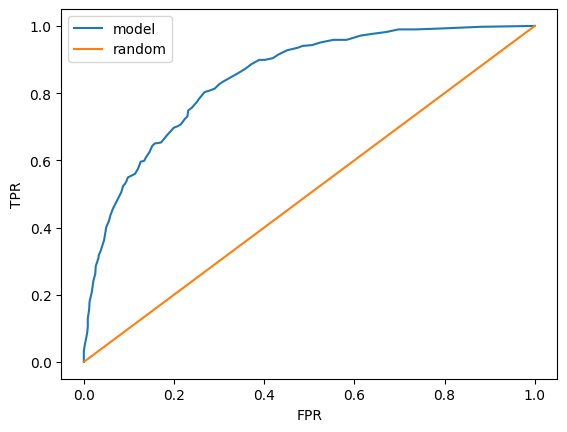

In [67]:
# plot FPR curves for all models
plt.plot(df_scores.fpr, df_scores.tpr, label = 'model')
#plt.plot(df_rand.fpr, df_rand.tpr, label = 'random')
plt.plot([0, 1], [0, 1], label = 'random')
#plt.plot(df_ideal.fpr, df_ideal.tpr, label = 'ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [68]:
from sklearn.metrics import roc_curve

In [69]:
# using sklearn to plot ROC Curves
# roc_curve(y_val, y_pred)

In [70]:
# assign the values from roc_curve to variable
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

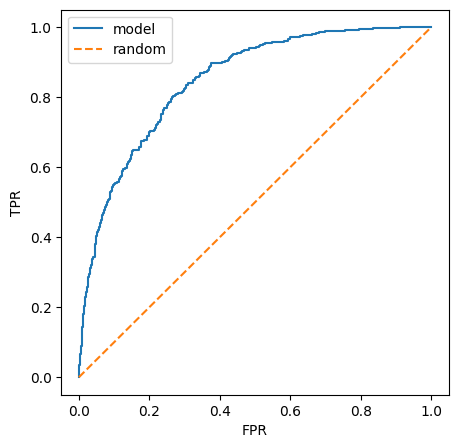

In [71]:
# plot FPR curves for all models

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label = 'model')
plt.plot([0, 1], [0, 1], label = 'random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

### 4.6 ROC AUC
* Area under the ROC curve - useful metric
* Interpretation of AUC

In [72]:
from sklearn.metrics import auc

In [73]:
# calculate the area under the curve using the all data with sklearn
auc(fpr, tpr)

np.float64(0.8465981898206534)

In [74]:
# calculate the area under the curve using data accessible to our model
auc(df_scores.fpr, df_scores.tpr)

np.float64(0.8463208889834327)

In [75]:
# calculate the area under the curve for ideal model
auc(df_ideal.fpr, df_ideal.tpr)

np.float64(0.9999430203759136)

In [76]:
# calculate area: TWO STEPS - use roc_curves and auc from sklearn
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

np.float64(0.8465981898206534)

In [77]:
from sklearn.metrics import roc_auc_score

In [78]:
# calculate area: ONE STEP - use roc_auc_score from sklearn
roc_auc_score(y_val, y_pred)

np.float64(0.8465981898206534)

In [79]:
# compare the score for the probability of positive and negative selection
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [80]:
import random

In [81]:
# count random selection that are positive and random selection that are negative
pos_ind = random.randint(0, len(pos) - 1)
neg_ind = random.randint(0, len(neg) - 1)

In [82]:
# check is the probability of making a randomly positive selection is higher than that for a negative selection
pos[pos_ind] > neg[neg_ind]

np.True_

In [83]:
# repeat the selection process several times to ascertain how many times or the probability that a positive selection is made over negative selection

n = 10000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)
    
    # check is the probability of making a randomly positive selection is higher than that for a negative selection
    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

0.8505

In [84]:
# instead of doing the loop several times, use numpy to generate x-thousand 
# random positive and negative indices, and then perform the comparison in a vectorized way

n = 50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

# select the scores for random positive and negative selection
(pos[pos_ind] > neg[neg_ind]).mean()


np.float64(0.84892)

### 4.7 Cross-Validation

* Evaluating the same model on different subsets of data
* Getting the average prediction and the spread within predictions

In [85]:
def train(df_train: pd.DataFrame, y_train: pd.Series) -> tuple[DictVectorizer, LogisticRegression]:
  """
  Trains a logistic regression model on the provided training data.

  This function performs the following steps:

  1. **Feature Selection:** Selects the 'categorical' and 'numerical' columns from the `df_train` DataFrame.
  2. **Feature Engineering:** Converts the selected features into a dictionary representation using `to_dict(orient='records')`.
  3. **Feature Vectorization:** Uses a `DictVectorizer` to transform the dictionary representation into a sparse matrix or dense numpy array (depending on the `sparse` parameter).
  4. **Model Training:** Fits a LogisticRegression model to the transformed features (`X_train`) and target variable (`y_train`).
  5. **Return Values:** Returns a tuple containing the fitted `DictVectorizer` and the trained `LogisticRegression` model.

  Args:
      df_train (pd.DataFrame): The training DataFrame containing features and target variable.
      y_train (pd.Series): The target variable (series) for training the model.

  Returns:
      tuple[DictVectorizer, LogisticRegression]: A tuple containing the fitted DictVectorizer and trained LogisticRegression model.
  """
  dicts = df_train[categorical + numerical].to_dict(orient='records')

  dv = DictVectorizer(sparse=False)
  X_train = dv.fit_transform(dicts)

  model = LogisticRegression(solver='liblinear', random_state=1)
  model.fit(X_train, y_train)

  return dv, model

In [86]:
dv, model = train(df_train, y_train)

In [87]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [88]:
y_pred = predict(df_val, dv, model)

In [89]:
from sklearn.model_selection import KFold

In [90]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [91]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [92]:
len(train_idx), len(val_idx)

(5070, 564)

In [93]:
len(df_full_train)

5634

In [94]:
# get the train and validation dataFrames
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [95]:
from tqdm.auto import tqdm

c:\Users\Efomah Fidelis\Documents\! DataTalk\ML\DataTalk_ML Video Tutorial\PROJECT\Machine Learning for Regression\price_predict_proj\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [96]:
# condensing the steps above

scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    # get the train and validation dataFrames
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.churn.values
    y_val = df_val.churn.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    # calculate the AUC in one-STEP using roc_auc_score from sklearn
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
    
    

10it [00:03,  2.60it/s]


In [97]:
scores

[np.float64(0.8493392490816277),
 np.float64(0.8420018564356436),
 np.float64(0.8590269587894291),
 np.float64(0.8330260883877869),
 np.float64(0.8242555831265509),
 np.float64(0.8416250416250417),
 np.float64(0.8437154021491371),
 np.float64(0.8223355471220746),
 np.float64(0.8450422409959982),
 np.float64(0.8611811367685119)]

In [98]:
# compute the mean score and the standard deviation
print('%.3f +. %.3f' % (np.mean(scores), np.std(scores)))

0.842 +. 0.012


In [99]:
# modify the train function
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    # model = LogisticRegression(solver='liblinear', random_state=1)
    # model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [100]:

n_splits = 5

# Create list to store results
results = []

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        
        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
    # print('C=%s, %0.3f ± %0.3f' % (C, np.mean(scores), np.std(scores)))
    results.append(f'C={C}, {np.mean(scores):.3f} ± {np.std(scores):.3f}')
print()

# Print results after progress bar is complete
for result in results:
    print(result)


100%|██████████| 7/7 [00:13<00:00,  1.91s/it]


C=0.001, 0.825 ± 0.013
C=0.01, 0.839 ± 0.009
C=0.1, 0.841 ± 0.008
C=0.5, 0.841 ± 0.007
C=1, 0.841 ± 0.007
C=5, 0.841 ± 0.007
C=10, 0.841 ± 0.007


In [102]:
scores

[np.float64(0.8422102032325675),
 np.float64(0.8452212455303934),
 np.float64(0.8335059201284366),
 np.float64(0.8322708160133018),
 np.float64(0.8522167487684729)]

In [101]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

y_test = df_test.churn.values

auc = roc_auc_score(y_test, y_pred)
auc

np.float64(0.8581350818464472)

### 4.8 Summary

* **Metric:** a single number that describes the performance of a model
* **Accuracy:** fraction of correct answers; sometimes misleading
* **Precision and recall:** are less misleading when we have class imbalance
* **ROC Curve:** a way to evaluate the performance at all thresholds; okay to use with imbalance
* **K-Fold CV:** more reliable estimate for performance (mean + std)

### 4.9 Explore more

* Check the precision and recall of the dummy classifier that always predicts "FALSE"
* F1 score = 2 * P * R / (P + R)
* Evaluate precision and recall at different thresholds, plot P vs R - this way you'll get the precision/recall curve (similar to ROC curve)
* Area under the PR curve is also a useful metric

**Other projects:**

* Calculate the metrics for datasets from the previous week